In [1]:
import numpy as np
import pandas as pd

<Axes: xlabel='time'>

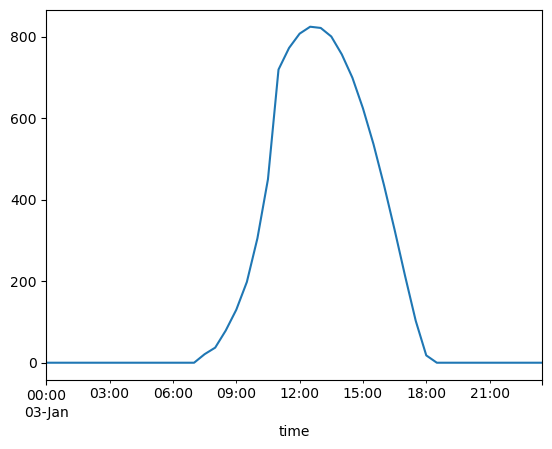

In [2]:
# Funciones trigonométricas.
def sin(x): return np.sin(np.radians(x))
def cos(x): return np.cos(np.radians(x))
def tan(x): return np.tan(np.radians(x))
def asin(x): return np.arcsin(x) * 180/np.pi
def acos(x): return np.arccos(x) * 180/np.pi
def atan(x): return np.arctan(x) * 180/np.pi

# Huso horario.
# La información está en UTC.
TZ = -6

path_f = [ f"/Users/rodrigo/Downloads/{x}/" for x in
    ["118732a9814b1cce30be83ae6846c338", "09a3146f598250e494b17fd7ab2b228e",
     "8b72b6833ba8991908023140eb48e20f", "48b30806053e210f6a72f2563343323a",
     "1b4fb35c34eadcc79bc655f23918f9ba" ] ]
name_f = "1427192_19.42_-99.15_2022.csv"
lat = 19.42
lon = -99.15
df = pd.read_csv(path_f[2] + name_f, skiprows = 2)

# Convertimos a fecha.
df["time"] = pd.to_datetime( df["Year"].astype(int).astype(str)
    + "/" + df["Month"].astype(int).astype(str) + "/"
    + df["Day"].astype(int).astype(str) + " "
    + df["Hour"].astype(int).astype(str) + ":"
    + df["Minute"].astype(int).astype(str) + ":00" )
df = df.set_index("time").drop( columns =
    ["Year", "Month", "Day", "Hour", "Minute"] )
df.loc[ (df.index.month==1) & (df.index.day==3), "GHI" ].plot()

In [3]:
# Eccentric anomaly of the earth in its orbit around the sun.
df["Day_Angle"] = 6.283185 * ( df.index.dayofyear - 1 ) / 365
# Declinación.
df["Declination"] = ( ( 0.006918 - 0.399912 * np.cos(df["Day_Angle"])
    + 0.070257*np.sin(df["Day_Angle"])
    - 0.006758*np.cos(2*df["Day_Angle"])
    + 0.000907*np.sin(2*df["Day_Angle"])
    - 0.002697*np.cos(3*df["Day_Angle"])
    + 0.00148*np.sin(3*df["Day_Angle"]) ) * 180/np.pi )
# Ecuación del tiempo.
df["Time_Equation"] = ( ( 0.000075 + 0.001868*np.cos(df["Day_Angle"])
    - 0.032077*np.sin(df["Day_Angle"])
    - 0.014615*np.cos(2*df["Day_Angle"])
    -0.040849*np.sin(2*df["Day_Angle"])) * 229.18 )
# Longitud del punto subsolar.
df["lon_subs"] = -15 * ( df.index.hour + df.index.minute/60 - TZ
    + df["Time_Equation"]/60 )
# Ángulo horario.
df["Hour_Angle"] = ( 15 * ( df.index.hour + df.index.minute/60 - 12
    - df["Time_Equation"]/60 + ((lon-TZ*15)*4)/60 ) )
#df = df.drop( columns = "Time_Equation" )
# Posiciones del analema solar.
df["Sz"] = ( sin(lat)*sin(df["Declination"])
    - cos(lat)*cos(df["Declination"])
    *cos(df["lon_subs"]-lon) )
#df = df.drop( columns = "lon_subs" )
# Ángulo del cénit solar.
df["Zenith_Angle"] = acos(df["Sz"])
#df = df.drop( columns = "Sz" )
# Ángulo acimutal solar.
df["Azimuth_Angle"] = acos( ( sin(df["Declination"])
    - cos(df["Zenith_Angle"])*sin(lat) )
    / ( sin(df["Zenith_Angle"])*cos(lat) ) )
df["Azimuth_Angle"] = df["Azimuth_Angle"].where(
    df["Hour_Angle"] < 0, 360 - df["Azimuth_Angle"] )
#df = df.drop( columns = ["Declination", "Hour_Angle"] )
# Masa de aire.
df["Air_Mass"] = ( 1/(cos(df["Zenith_Angle"])
    + 0.15/(93.885 - df["Zenith_Angle"])**1.253 )
    * df["Pressure"]/1013.25 )
df["Air_Mass"] = df["Air_Mass"].where( df["Zenith_Angle"] < 85.5, 0 )
#df = df.drop( columns = ["Day_Angle"] )

df.iloc[10:40][ ["lon_subs", "Hour_Angle",
    "GHI", "Azimuth_Angle", "Zenith_Angle"] ]

,lon_subs,Hour_Angle,GHI,Azimuth_Angle,Zenith_Angle
time,,,,,
2022-01-01 05:00:00,-164.273958,-113.423958,0,106.085111,119.686564
2022-01-01 05:30:00,-171.773958,-105.923958,0,107.568709,112.915668
2022-01-01 06:00:00,-179.273958,-98.423958,0,109.270524,106.204267
2022-01-01 06:30:00,-186.773958,-90.923958,0,111.206936,99.567114
2022-01-01 07:00:00,-194.273958,-83.423958,0,113.407272,93.022460
2022-01-01 07:30:00,-201.773958,-75.923958,40,115.914027,86.593369
2022-01-01 08:00:00,-209.273958,-68.423958,142,118.784354,80.309480
2022-01-01 08:30:00,-216.773958,-60.923958,261,122.092399,74.209404
2022-01-01 09:00:00,-224.273958,-53.423958,379,125.931904,68.343943


In [4]:
cases = [ "no_track", "1_track", "2_track", "bifacial_vertical" ]
track_tilt    = [ f"{x}_Tilt"               for x in cases ]
track_azimuth = [ f"{x}_Azimuth"            for x in cases ]
track_AOI     = [ f"{x}_Angle_of_Incidence" for x in cases ]
track_POA     = [ f"{x}_POA"                for x in cases ]

azimuth_tracker = 180
tilt_tracker    = 0

df[track_azimuth[0]] = 180
df[track_tilt[0]   ] = lat
df[track_tilt[1]   ] = np.abs( atan( tan(df["Zenith_Angle"])
    * sin(df["Azimuth_Angle"] - azimuth_tracker) ) )
df[track_azimuth[1]] = 90
df[track_azimuth[1]] = df["1_track_Azimuth"
    ].where(df["Azimuth_Angle"]<180, 270)
df[track_tilt[2]   ] = df["Zenith_Angle"]
df[track_azimuth[2]] = df["Azimuth_Angle"]
df[track_tilt[3]   ] = 90
df[track_azimuth[3]] = 270
df.iloc[10:40][ ["GHI", "Azimuth_Angle",
    "Zenith_Angle", "1_track_Tilt", "1_track_Azimuth"] ]

,GHI,Azimuth_Angle,Zenith_Angle,1_track_Tilt,1_track_Azimuth
time,,,,,
2022-01-01 05:00:00,0,106.085111,119.686564,59.319072,90
2022-01-01 05:30:00,0,107.568709,112.915668,66.086451,90
2022-01-01 06:00:00,0,109.270524,106.204267,72.888674,90
2022-01-01 06:30:00,0,111.206936,99.567114,79.752183,90
2022-01-01 07:00:00,0,113.407272,93.022460,86.707070,90
2022-01-01 07:30:00,40,115.914027,86.593369,86.213595,90
2022-01-01 08:00:00,142,118.784354,80.309480,78.974773,90
2022-01-01 08:30:00,261,122.092399,74.209404,71.540905,90
2022-01-01 09:00:00,379,125.931904,68.343943,63.878040,90


In [5]:
# Modelo de Pérez de Cielo Difuso.

# Diffuse Horizontal Radiation.
df["DHI"] = df["GHI"] - df["DNI"] * cos(df["Zenith_Angle"])
df["DHI"] = df["DHI"].where(df["DHI"]>0, 0.001)
K = 5.535e-6
# Perez clearness bins.
df["bins"] = 0
df["bins"] = df["bins"].where( df["DHI"] == 0.001,
    ( (df["DHI"]+df["DNI"])/df["DHI"] + K*df["Zenith_Angle"]**3 )
    / ( 1 + K*df["Zenith_Angle"]**3 ) )
df["DHI"] = df["DHI"].where(df["DHI"]>0.001, 0)
df["epsilon"] = df["bins"   ].where( df["bins"] < 6.200, 8 )
df["epsilon"] = df["epsilon"].where( 
    ~( (df["bins"]>4.500) & (df["bins"]<6.200) ), 7 )
df["epsilon"] = df["epsilon"].where( 
    ~( (df["bins"]>2.600) & (df["bins"]<4.500) ), 6 )
df["epsilon"] = df["epsilon"].where( 
    ~( (df["bins"]>1.950) & (df["bins"]<2.600) ), 5 )
df["epsilon"] = df["epsilon"].where( 
    ~( (df["bins"]>1.500) & (df["bins"]<1.950) ), 4 )
df["epsilon"] = df["epsilon"].where( 
    ~( (df["bins"]>1.230) & (df["bins"]<1.500) ), 3 )
df["epsilon"] = df["epsilon"].where( 
    ~( (df["bins"]>1.065) & (df["bins"]<1.500) ), 2 )
df["epsilon"] = df["epsilon"].where( df["bins"] > 1.065, 1 )
Perez = pd.read_csv("../code/Perez.csv", index_col = "bin" )
#df = df.drop( columns = "bins" )
# Extraterrestrial radiation.
Ea = 1367
# Coeficientes.
df["Delta"] = df["DHI"] * df["Air_Mass"] / Ea
#df = df.drop( columns = "Air_Mass" )
for j in Perez.columns:
    df[j] = 0.0
    for i in Perez.index:
        df[j] = df[j].where(df["epsilon"] != i, Perez.loc[i, j] )
#df = df.drop( columns = "epsilon" )
df["F1"] = ( df["f11"] + df["f12"]*df["Delta"]
    + np.radians(df["Zenith_Angle"])*df["f13"] )
#df = df.drop( columns = ["f11", "f12", "f13"] )
df["F1"] = df["F1"].where( df["F1"] < 0, 0 )
df["F2"] = ( df["f21"] + df["f22"]*df["Delta"]
    + np.radians(df["Zenith_Angle"])*df["f23"] )
#df = df.drop( columns = ["f21", "f22", "f23"] )
#df = df.drop( columns = ["Delta"] )
df["b"] = cos(df["Zenith_Angle"])
df["b"] = df["b"].where( df["b"] < cos(85), cos(85) )

for i in range(len(cases[0:3])):
    # Ángulo entre el panel y el sol.
    df[track_AOI[i]] = (
        cos(df["Zenith_Angle"])*cos(df[track_tilt[i]])
        + sin(df["Zenith_Angle"])*sin(df[track_tilt[i]])
        *cos(df["Azimuth_Angle"]-df[track_azimuth[i]]) )
    df[track_AOI[i]] = df[track_AOI[i]].where( df[track_AOI[i]] < 1, 1 )
    df[track_AOI[i]] = df[track_AOI[i]].where( df[track_AOI[i]] > -1, -1 )
    df[track_AOI[i]] = acos(df[track_AOI[i]])
    #df = df.drop( columns = "Azimuth_Angle" )
    df["a"] = cos(df[track_AOI[i]])
    df["a"] = df["a"].where( df["a"] < 0, 0 )
    # Radiación difusa.
    df["I_d"] = ( df["DHI"] * ( (1-df["F1"])*((1+cos(df[track_tilt[i]]))/2)
        + df["F1"]*df["a"]/df["b"] + df["F2"]*sin(df[track_tilt[i]]) ) )
    df["I_d_90"] = ( df["DHI"] * ((1+cos(df[track_tilt[i]]))/2) )
    df["I_d"] = df["I_d"].where( df["Zenith_Angle"] < 87.5, df["I_d_90"] )
    #df = df.drop( columns = "I_d_90" )
    df["I_d"] = df["I_d"].where( df["Zenith_Angle"] < 90, 0 )
    #df = df.drop( columns = ["F1", "F2", "a", "b", "DHI"] )
    #df = df.drop( columns = "Zenith_Angle" )
    # Radiación directa.
    df["I_b"] = df["DNI"] * cos(df[track_AOI[i]])
    df["I_b"] = df["I_b"].where( df[track_AOI[i]] < 90, 0 )
    #df = df.drop( columns = track_AOI[k] )
    # Radiación total en el panel.
    df[track_POA[i]] = df["I_b"] + df["I_d"]
    #df = df.drop( columns = ["I_b", "I_d"] )

df.iloc[10:40][["GHI"] + track_POA[0:3] + track_AOI[0:3]]

,GHI,no_track_POA,1_track_POA,2_track_POA,no_track_Angle_of_Incidence,1_track_Angle_of_Incidence,2_track_Angle_of_Incidence
time,,,,,,,
2022-01-01 05:00:00,0,0.000000,0.000000,0.000000,112.770939,62.277779,0.000000e+00
2022-01-01 05:30:00,0,0.000000,0.000000,0.000000,105.949002,49.841807,8.537736e-07
2022-01-01 06:00:00,0,0.000000,0.000000,0.000000,99.080020,38.349903,0.000000e+00
2022-01-01 06:30:00,0,0.000000,0.000000,0.000000,92.186111,28.945598,8.537736e-07
2022-01-01 07:00:00,0,0.000000,0.000000,0.000000,85.286390,24.232727,0.000000e+00
2022-01-01 07:30:00,40,87.200841,306.086200,337.975483,78.399291,25.864845,8.537736e-07
2022-01-01 08:00:00,142,233.969426,565.236520,636.832572,71.544736,28.336160,8.537736e-07
2022-01-01 08:30:00,261,382.426862,704.676253,810.525008,64.746645,30.746253,0.000000e+00
2022-01-01 09:00:00,379,520.854019,780.076376,916.799307,58.036449,33.052201,0.000000e+00
